<a href="https://colab.research.google.com/github/Luckas33/MetodosNumericos/blob/master/TrabalhoComputacional_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

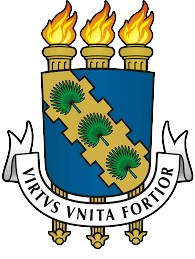
# Universidade Federal do Ceará  
## Departamento de Computação  

---

### Disciplina: **Métodos Numéricos**  
**Professor:** João Paulo do Vale Madeiro  

---

### **Alunos:**
- Lucas de Oliveira Sobral, 556944
- Mateus Andrade Maia, 552593


# TRABALHO COMPUTACIONAL 1

----

## *Problema de Rede de Tubos*

Um fluido é bombeado na rede de tubos mostrada na figura abaixo. No estado estacionário, os seguintes balanços de escoamento precisam ser satisfeitos:
\begin{align*}
    Q_1 &= Q_2 + Q_3 \\
    Q_3 &= Q_4 + Q_5 \\
    Q_5 &= Q_6 + Q_7
\end{align*}
onde $Q_i$ é o escoamento no tubo $i (m^3/s)$.

Além disso, as quedas de pressão em torno dos três laços à direita devem ser nulas. A queda de pressão em cada seção de tubo circular pode ser calculada por:
$$ \Delta P = \frac{16}{\pi^2} \cdot \frac{f.L.\rho}{2D^5}.Q^2 $$
em que $\Delta P$ é a queda de pressão (Pa), $f$ é o fator de atrito (adimensional), $L$ é o comprimento do tubo (m), $\rho$ é a

 densidade do fluido $(kg/m^3)$ e $D$ é o diâmetro do tubo (m).


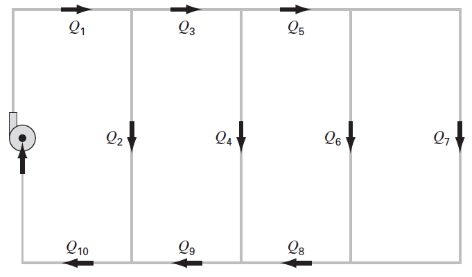

Escreva um programa que lhe permita calcular o escoamento em todas as seções de tubo, dado que $𝑸𝟏= \frac{𝟏𝒎^𝟑}{𝒔},𝝆=𝟏,𝟐𝟑𝒌𝒈/𝒎^𝟑$. Todos os tubos têm $𝑫=𝟓𝟎𝟎𝒎𝒎$ e $f= 0,005$.  Os  comprimentos  dos  tubos  são $𝑳𝟑=𝑳𝟓=𝑳𝟖=𝑳𝟗=𝟐𝒎;𝑳𝟐=𝑳𝟒=𝑳𝟔=𝟒𝒎;𝑳𝟕=𝟖𝒎$.

Q1 = Q2 + Q3


Q3 = Q4 + Q5


Q5 = Q6 + Q7



## Começando a Resolução do problema

Primeiramente, para nós conseguirmos calcular todos os escoamentos de cada seção, vamos precisar encontrar diferentes equações para conseguir ter um sistema de equações a ser resolvido.  
Para isso, vamos usar dois conceitos semelhantes aos de circuitos elétricos: a **Lei de Kirchhoff dos Nós** e a **Lei de Kirchhoff das Malhas**.

---

### 🔵 Lei de Kirchhoff dos Nós

Usando a Lei de Kirchhoff dos Nós, podemos tirar 5 equações nos nós A, B, C, D, e E indicados na imagem abaixo.  
Essa lei afirma que o fluxo de água que entra em um nó é o mesmo que sai dele:

- Para o nó A:  
  Q<sub>1</sub> = Q<sub>2</sub> + Q<sub>3</sub>

- Para o nó B:  
  Q<sub>3</sub> = Q<sub>4</sub> + Q<sub>5</sub>

- Para o nó C:  
  Q<sub>5</sub> = Q<sub>6</sub> + Q<sub>7</sub>

- Para o nó D: \\
  Q<sub>8</sub> = Q<sub>6</sub> + Q<sub>7</sub>

- Para o nó E:  
  Q<sub>9</sub> = Q<sub>4</sub> + Q<sub>8</sub>

---

### 🔴 Lei de Kirchhoff das Malhas

Para esse caso, a Lei de Kirchhoff das Malhas será usada para o cálculo da variação de pressão em cada malha do sistema.  
Ela afirma que a soma das variações de pressão ao longo de uma malha fechada deve ser igual a zero:

- Para a Malha 1:  
  $\Delta$P<sub>3</sub> + $\Delta$P<sub>4</sub> + $\Delta$P<sub>9</sub> - $\Delta$P<sub>2</sub> = 0

- Para a Malha 2:  
  $\Delta$P<sub>5</sub> + $\Delta$P<sub>6</sub> + $\Delta$P<sub>8</sub> - $\Delta$P<sub>4</sub> = 0

- Para a Malha 3:  
  $\Delta$P<sub>7</sub> - $\Delta$P<sub>6</sub> = 0

Em que $\Delta$P pode ser escrito em função da vazão Q através da seguinte formula:

$$
\Delta P \;=\; \frac{16}{\pi^{2}} \;\cdot\; \frac{F\,L\,p}{2\,D^{5}} \;\cdot\; Q^{2}
$$

Com isso, nós obtemos todas as 8 equações para encontrar as 8 variáveis de vazão Q<sub>2</sub> a Q<sub>9</sub>. O Q<sub>10</sub> não foi fornecida a informação do comprimento do tubo, tornando inviavel o cálculo


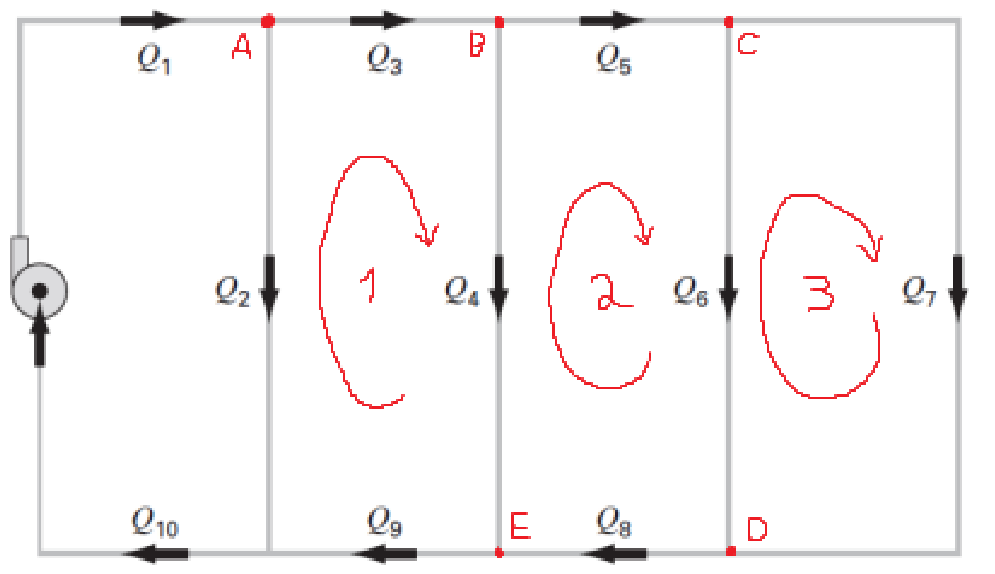

# Importe das bibliotecas

Primeiramente, para começar a resolução do problema, vamos importar as bibliotecas numpy para alguns cálculos e matplotlib para criação de gráficos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular a variação da pressão

In [ ]:
def calcular_delta_p(Q, L, D, f, rho):
    return (16 / (np.pi**2)) * (f * L * rho) / (2 * D**5) * Q**2

# Implementação do método de Gauss

In [ ]:
def gauss_elimination(A, b):
    """
    Resolve sistema Ax = b usando eliminação de Gauss com pivotamento parcial
    """
    n = len(b)
    # Cria matriz aumentada
    Ab = np.column_stack([A.copy(), b.copy()])

    # Eliminação progressiva
    for k in range(n):
        # Pivotamento parcial
        max_row = k
        for i in range(k+1, n):
            if abs(Ab[i, k]) > abs(Ab[max_row, k]):
                max_row = i

        # Troca linhas se necessário
        if max_row != k:
            Ab[[k, max_row]] = Ab[[max_row, k]]

        # Verifica se pivot é zero
        if abs(Ab[k, k]) < 1e-14:
            raise ValueError("Sistema singular ou mal condicionado")

        # Eliminação
        for i in range(k+1, n):
            factor = Ab[i, k] / Ab[k, k]
            for j in range(k, n+1):
                Ab[i, j] -= factor * Ab[k, j]

    # Substituição regressiva
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = Ab[i, n]
        for j in range(i+1, n):
            x[i] -= Ab[i, j] * x[j]
        x[i] /= Ab[i, i]

    return x

# Implementação da Norma Eucliadiana

In [ ]:
def norma_euclidiana(vetor):
    """Calcula a norma euclidiana de um vetor"""
    soma = 0.0
    for elemento in vetor:
        soma += elemento * elemento
    return soma ** 0.5

# Definição do Sistema de Equações

In [ ]:
def sistema_equacoes(vars):
    """
    Sistema de equações não-lineares
    Variáveis: [Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9]
    Q1 = 1 m³/s (dado)
    """
    Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9 = vars
    Q1 = 1.0  # m³/s (dado)

    # Parâmetros dos tubos
    rho = 1.23  # kg/m³
    D = 0.5     # m (500 mm)
    f = 0.005

    # Comprimentos dos tubos
    L2, L4, L6 = 4, 4, 4  # m
    L3, L5, L8, L9 = 2, 2, 2, 2  # m
    L7 = 8  # m

    # Equações de balanço de massa nos nós
    eq1 = Q1 - Q2 - Q3           # Nó superior: Q1 = Q2 + Q3
    eq2 = Q3 - Q4 - Q5           # Nó central esquerdo: Q3 = Q4 + Q5
    eq3 = Q5 - Q6 - Q7           # Nó central direito: Q5 = Q6 + Q7
    eq4 = Q8 - Q6 - Q7           # Nó inferior esquerdo: Q8 = Q6 + Q7
    eq5 = Q9 - Q4 - Q8       # Nó inferior direito: Q9 = Q4 + Q8

    # Equações de balanço de pressão nos laços (soma das quedas = 0)
    # Laço superior (tubos 2, 3, 4): ΔP2 - ΔP3 - ΔP4 = 0
    deltaP2 = calcular_delta_p(Q2, L2, D, f, rho)
    deltaP3 = calcular_delta_p(Q3, L3, D, f, rho)
    deltaP4 = calcular_delta_p(Q4, L4, D, f, rho)
    deltaP5 = calcular_delta_p(Q5, L5, D, f, rho)
    deltaP6 = calcular_delta_p(Q6, L6, D, f, rho)
    deltaP7 = calcular_delta_p(Q7, L7, D, f, rho)
    deltaP8 = calcular_delta_p(Q8, L8, D, f, rho)
    deltaP9 = calcular_delta_p(Q9, L9, D, f, rho)
    eq6 = deltaP3 + deltaP4 + deltaP9 - deltaP2
    eq7 = deltaP5 + deltaP6 + deltaP8 - deltaP4
    eq8 = deltaP7 - deltaP6

    return np.array([eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8])

# Cálculo do Jacobiano

In [ ]:
def jacobiano(vars):
    """Calcula o jacobiano do sistema"""
    Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9 = vars

    # Parâmetros
    rho = 1.23
    D = 0.5
    f = 0.005
    L2, L4, L6 = 4, 4, 4
    L3, L5, L8, L9 = 2, 2, 2, 2
    L7 = 8

    # Constante para derivadas de ΔP
    k = (16 / (np.pi**2)) * (f * rho) / (2 * D**5)

    # Matriz jacobiana 8x8
    jac = np.zeros((8, 8))

    # Derivadas das equações de balanço de massa
    jac[0, :] = [-1, -1, 0, 0, 0, 0, 0, 0]    # eq1: -Q2 - Q3
    jac[1, :] = [0, 1, -1, -1, 0, 0, 0, 0]    # eq2: Q3 - Q4 - Q5
    jac[2, :] = [0, 0, 0, 1, -1, -1, 0, 0]    # eq3: Q5 - Q6 - Q7
    jac[3, :] = [0, 0, 0, 0, -1, -1, 1, 0]    # eq4: Q2 + Q4 - Q8
    jac[4, :] = [0, 0, -1, 0, 0, 0, -1, 1]    # eq5: Q6 + Q7 - Q9

    # Derivadas das equações de pressão
    # eq6: ΔP3 + ΔP4 + ΔP9 - ΔP2 = 0
    jac[5, 1] = 2 * k * L3 * Q3   # d/dQ3
    jac[5, 2] = 2 * k * L4 * Q4   # d/dQ4
    jac[5, 7] = 2 * k * L9 * Q9   # d/dQ9
    jac[5, 0] = -2 * k * L2 * Q2  # d/dQ2

    # eq7: ΔP5 + ΔP6 + ΔP8 - ΔP4 = 0
    jac[6, 3] = 2 * k * L5 * Q5   # d/dQ5
    jac[6, 4] = 2 * k * L6 * Q6   # d/dQ6
    jac[6, 6] = 2 * k * L8 * Q8   # d/dQ8
    jac[6, 2] = -2 * k * L4 * Q4  # d/dQ4

    # eq8: ΔP7 - ΔP6 = 0
    jac[7, 5] = 2 * k * L7 * Q7   # d/dQ7
    jac[7, 4] = -2 * k * L6 * Q6  # d/dQ6

    return jac

# Implementação de Newton-Raphson para Sistemas

In [ ]:
def newton_raphson(x0, tol, max_iter):
    """Método de Newton-Raphson para sistemas não-lineares"""
    x = x0.copy()

    print("Iteração | Erro")
    print("-" * 20)

    for i in range(max_iter):
        f_x = sistema_equacoes(x)
        jac_x = jacobiano(x)

        # Resolve o sistema linear: jac * delta_x = -f_x usando eliminação de Gauss
        try:
            delta_x = gauss_elimination(jac_x, -f_x)
        except ValueError as e:
            print(f"Erro: {e}")
            return None

        # Atualiza x
        x_novo = x + delta_x

        # Calcula o erro usando norma euclidiana manual
        erro = norma_euclidiana(delta_x)
        print(f"{i+1:8d} | {erro:.2e}")

        if erro < tol:
            print(f"\nConvergência alcançada em {i+1} iterações")
            return x_novo

        x = x_novo

    print("Número máximo de iterações atingido")
    return x

# Função Principal

Chute inicial:
Q2=0.400, Q3=0.600, Q4=0.200, Q5=0.400
Q6=0.200, Q7=0.200, Q8=0.600, Q9=0.400

Iteração | Erro
--------------------
       1 | 4.02e-01
       2 | 1.07e-01
       3 | 5.99e-03
       4 | 5.98e-05
       5 | 8.30e-09
       6 | 1.70e-16

Convergência alcançada em 6 iterações

SOLUÇÃO ENCONTRADA:
--------------------
Q1 = 1.000000 m³/s (dado)
Q2 = 0.531610 m³/s
Q3 = 0.468390 m³/s
Q4 = 0.251436 m³/s
Q5 = 0.216953 m³/s
Q6 = 0.127088 m³/s
Q7 = 0.089865 m³/s
Q8 = 0.216953 m³/s
Q9 = 0.468390 m³/s

VERIFICAÇÃO DOS BALANÇOS DE MASSA:
--------------------------------
Nó superior:        Q1 - Q2 - Q3 = 0.00e+00
Nó central esq:     Q3 - Q4 - Q5 = -5.55e-17
Nó central dir:     Q5 - Q6 - Q7 = 1.39e-17
Nó inferior esq:    Q8 - Q6 - Q7 = 1.39e-17
Nó inferior dir:    Q9 - Q8 - Q4 = -5.55e-17

Resíduo final do sistema: 8.58e-17


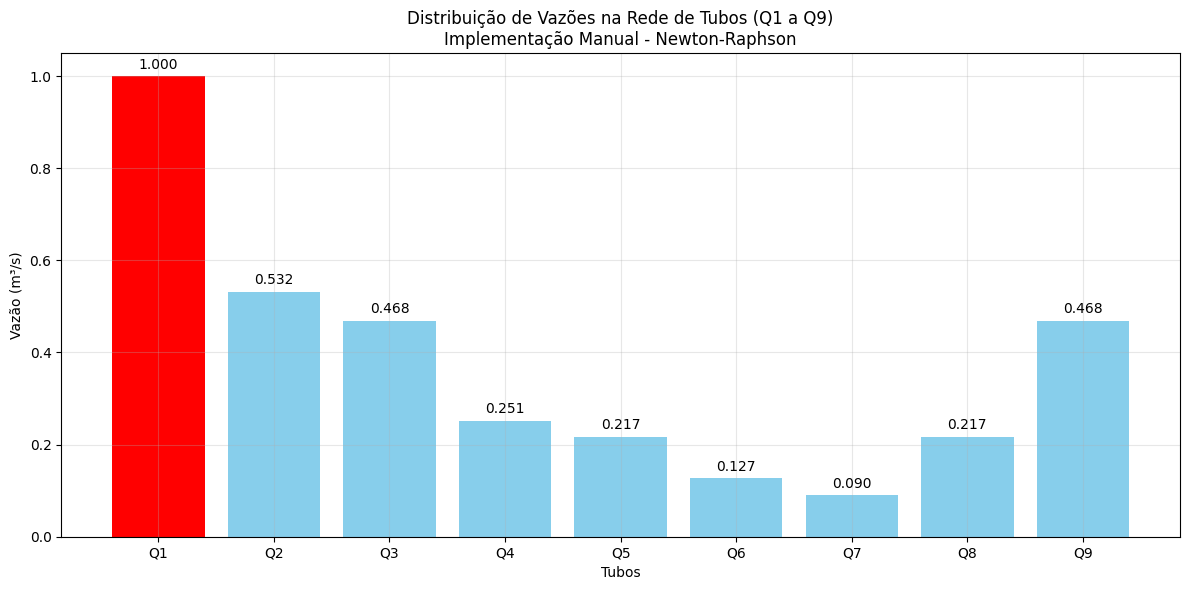


TABELA RESUMO:
------------------------------
Tubo | Vazão (m³/s) | Comprimento (m)
------------------------------
Q1   |    1.000000 | -            
Q2   |    0.531610 |             4
Q3   |    0.468390 |             2
Q4   |    0.251436 |             4
Q5   |    0.216953 |             2
Q6   |    0.127088 |             4
Q7   |    0.089865 |             8
Q8   |    0.216953 |             2
Q9   |    0.468390 |             2


In [ ]:
def main():
    # Chute inicial (distribuição aproximadamente uniforme)
    x0 = np.array([0.4, 0.6, 0.2, 0.4, 0.2, 0.2, 0.6, 0.4])
    print(f"Chute inicial:")
    print(f"Q2={x0[0]:.3f}, Q3={x0[1]:.3f}, Q4={x0[2]:.3f}, Q5={x0[3]:.3f}")
    print(f"Q6={x0[4]:.3f}, Q7={x0[5]:.3f}, Q8={x0[6]:.3f}, Q9={x0[7]:.3f}")
    print()

    # Resolve o sistema
    solucao = newton_raphson(x0,1e-15,50)

    if solucao is not None:
        Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9 = solucao
        Q1 = 1.0

        print("\nSOLUÇÃO ENCONTRADA:")
        print("-" * 20)
        print(f"Q1 = {Q1:.6f} m³/s (dado)")
        print(f"Q2 = {Q2:.6f} m³/s")
        print(f"Q3 = {Q3:.6f} m³/s")
        print(f"Q4 = {Q4:.6f} m³/s")
        print(f"Q5 = {Q5:.6f} m³/s")
        print(f"Q6 = {Q6:.6f} m³/s")
        print(f"Q7 = {Q7:.6f} m³/s")
        print(f"Q8 = {Q8:.6f} m³/s")
        print(f"Q9 = {Q9:.6f} m³/s")

        # Verificação dos balanços de massa
        print(f"\nVERIFICAÇÃO DOS BALANÇOS DE MASSA:")
        print("-" * 32)
        print(f"Nó superior:        Q1 - Q2 - Q3 = {Q1 - Q2 - Q3:.2e}")
        print(f"Nó central esq:     Q3 - Q4 - Q5 = {Q3 - Q4 - Q5:.2e}")
        print(f"Nó central dir:     Q5 - Q6 - Q7 = {Q5 - Q6 - Q7:.2e}")
        print(f"Nó inferior esq:    Q8 - Q6 - Q7 = {Q8 - Q6 - Q7:.2e}")
        print(f"Nó inferior dir:    Q9 - Q8 - Q4 = {Q9 - Q8 - Q4:.2e}")

        # Verificação das pressões usando norma manual
        residuo = sistema_equacoes(solucao)
        norma_residuo = norma_euclidiana(residuo)
        print(f"\nResíduo final do sistema: {norma_residuo:.2e}")

        # Gráfico
        plt.figure(figsize=(12, 6))
        vazoes = [Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9]
        tubos = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9']

        cores = ['red'] + ['skyblue']*8
        barras = plt.bar(tubos, vazoes, color=cores)
        plt.ylabel('Vazão (m³/s)')
        plt.xlabel('Tubos')
        plt.title('Distribuição de Vazões na Rede de Tubos (Q1 a Q9)\nImplementação Manual - Newton-Raphson')
        plt.grid(True, alpha=0.3)

        for i, v in enumerate(vazoes):
            plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        # Resumo
        print(f"\nTABELA RESUMO:")
        print("-" * 30)
        print("Tubo | Vazão (m³/s) | Comprimento (m)")
        print("-" * 30)
        comprimentos = ['-', 4, 2, 4, 2, 4, 8, 2, 2]
        for i, (tubo, vazao, comp) in enumerate(zip(tubos, vazoes, comprimentos)):
            if i == 0:
                print(f"{tubo:4s} | {vazao:11.6f} | {comp:13s}")
            else:
                print(f"{tubo:4s} | {vazao:11.6f} | {comp:13d}")

if __name__ == "__main__":
    main()